# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We will play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Table of Contents

> #### 1. Data Sources
> #### 2. Read the dataset
> #### 3. Identify Missing Values and Drop Unnecessary Columns
> #### 4. Clean Column Names
> #### 5. Filter the Data
> #### 6. Verify the Data
> #### 7. Create a New Column
> #### 8. Identify Dissatisfied Employees
> #### 9. Combine the Data
> #### 10. Clean the Service Column
> #### 11. Perform Initial Analysis
> #### 12. Conclusion

### Data Sources

You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. 

---------

### Read the dataset

In [1]:
# import useful librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the datasets
dete_survey = pd.read_csv("datasets/dete_survey.csv", encoding="utf-8")
tafe_survey = pd.read_csv("datasets/tafe_survey.csv", encoding="utf-8")

In [3]:
# Get useful information about the dataset
print(dete_survey.info())
print()
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

Looking at the result above, we observe that the `dete_survey dataset has 822 rows and a total of 56 columns`. Apart from the ID column which is integer, most of the columns are bool and object datatype. The `tafe_survey dataset is made up of 702 rows and a total 72 columns` (2 floats and 70 object datatypes).
We equally notice that there are some column with null values which will explore below.

In [4]:
# view first 5 rows of the dete_survey dataset
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# view first 5 rows of the tafe_survey dataset
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Below is a preview of a couple columns we'll work with from the dete_survey.csv:

|Column|Description|
|:---|:---|
|ID |An id used to identify the participant of the survey|
|SeparationType |The reason why the person's employment ended|
|Cease Date |The year or month the person's employment ended|
|DETE Start Date |The year the person began employment with the DETE|

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

|Column|Description|
|:---|:---|
|Record ID |An id used to identify the participant of the survey|
|Reason for ceasing employment |The reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years) |The length of the person's employment (in years)|

------------

In [6]:
# display the number of null entries in the dete_survey dataset
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
# display the number of null entries in the tafe_survey dataset
tafe_survey.isnull().sum().sort_values()

Record ID                                                          0
Institute                                                          0
WorkArea                                                           0
Reason for ceasing employment                                      1
CESSATION YEAR                                                     7
                                                                ... 
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Ill Health                                 265
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Main Factor. Which of these was the main factor for leaving?     589
Length: 72, dtype: int64

We notice that there are several columns with null values in both datasets, with `Aboriginal, Torres Strait, South Sea, Disability and NESB` having the highest number of the null values in the dete_survey dataset, while the `InductionInfo. Topic:Did you undertake a Corporate Induction?` and `Main Factor. Which of these was the main factor for leaving?` columns have the highest number of null values in the tafe_survey dataset.

We can summarize this section as follows:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

-----

### Identify Missing Values and Drop Unnecessary Columns

In this section, we will read the dete_survey dataset again, but this time reading ghe `Not Stated values as NaN` and also drop the columns that are not needed to complete our analysis.

In [8]:
# identify Not Stated values as NaN
dete_survey = pd.read_csv("datasets/dete_survey.csv", na_values="Not Stated")

In [9]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
# drop column 28 to 48 of dete_survey and 17 to 65 of tafe_survey datasets
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [11]:
print(dete_survey_updated.info())
print()
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Now we are left with `35 columns in the dete_survey_updated` dataframe and `23 column in the tafe_survey_updated` dataframe

-----

### Clean Column Names

In this section, we will turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.

In [12]:
# Rename the columns in the dete_survey_updated dataframe
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ", "_").str.strip().str.lower()

In [13]:
# Rename the columns in the tafe_survey_updated dataframe
new_columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
               'Reason for ceasing employment': 'separationtype',
               'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age',
               'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
              }
tafe_survey_updated = tafe_survey_updated.rename(new_columns, axis=1)

In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We successfully renamed some of the columns in the dete_survey_updated and tafe_survey_updated dataframes. We will handle the other columns later.

-----

### Filter the Data

Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
If we look at the unique values in the `separationtype columns` in each dataframe, we will see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who `resigned`, so their separation type contains the string `'Resignation'`.

In [16]:
# display unique values in the separationtype column in both dataframes

print(dete_survey_updated["separationtype"].value_counts())
print()
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [17]:
# select only data for survey respondents who have a Resignation separation type
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")==True]
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation")==True]

In [18]:
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [19]:
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

From the result above, we observe that we are left with only data for survey respondents who have a Resignation separation type.

----

### Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we will also want to check the data for other issues as well!

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940

In [20]:
# clean the cease_date column in dete_resignations
dete_resignations["cease_date"].value_counts

<bound method IndexOpsMixin.value_counts of 3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
        ...   
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object>

In [21]:
# Use vectorized string methods to extract the year.
dete_resignations = dete_resignations.copy()
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"([1-2][0-9]{3})").astype(float)

In [22]:
# check the values in the cease_date column in dete_resignations
dete_resignations["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [23]:
# check the values in the dete_start_date column in dete_resignations
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [24]:
# check the values in the cease_date column in tafe_resignations
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Our observation above shows that the earliest start date in the dete_resignation was 1963 and the the latest start date was 2013
When when look up the tafe_resignation cease date, we observe that the earliest start date was 2009 and the latest cease date being 2013.

-----

###  Create a New Column

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the tafe_resignations dataframe already contains a `"service" column`, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [25]:
# create copy data to avoid the SettingWithCopy Warning
dete_resignations = dete_resignations.copy()
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"] 

In [26]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0


We have just created  new column `institute_service` in the `dete_resignation` data. This is the years of service of the employee, calculated as `cease date minus start year`

-------

### Identify Dissatisfied Employees

In the last section, we created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment.
Next, we will identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

> 1. tafe_survey_updated:
> * Contributing Factors. Dissatisfaction
> * Contributing Factors. Job Dissatisfaction

> 2. dete_survey_updated:
> * job_dissatisfaction
> * dissatisfaction_with_the_department
> * physical_work_environment
> * lack_of_recognition
> * lack_of_job_security
> * work_location
> * employment_conditions
> * work_life_balance
> * workload

If the employee indicated any of the factors above caused them to resign, we will mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

> * `True`: indicates a person resigned because they were dissatisfied with the job
> * `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
> * `NaN`: indicates the value is missin

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

 Above, we view the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` columns in the tafe_resignations. We observe that majority of the enteries had no response mark by `-`
 
Next, we will update the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the tafe_resignations dataframe so that each contains only `True`, `False`, or `NaN` values.


In [29]:
# Write a function update_vals that will makes the changes
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif str(element) == "-":
        return False
    else:
        return True

tafe_resignations = tafe_resignations.copy()
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

Note now that we have only have `False`, `True` and `NaN` values in the two columns

In [32]:
# identify factor columns
tafe_factors = ["Contributing Factors. Dissatisfaction",
                "Contributing Factors. Job Dissatisfaction"
               ]
dete_factors = ["job_dissatisfaction",
                "dissatisfaction_with_the_department",
                "physical_work_environment",
                "lack_of_recognition",
                "lack_of_job_security",
                "work_location",
                "employment_conditions",
                "work_life_balance",
                "workload"
               ]

tafe_resignations["dissatisfied"] = tafe_resignations[tafe_factors].any(axis=1, skipna=False)
dete_resignations["dissatisfied"] = dete_resignations[dete_factors].any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [33]:
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [34]:
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

Finally in this section, we have ended with a new column `'dissatisfied'` in BOTH dete_resignations_up and tafe_resignations_up showing whether an employee left because of dissatisfaction or not.

-----

###  Combine the Data

In [35]:
# add a column to each dataframe to easily distinguish between the two
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [36]:
# combine both dataset by stacking them, axis=0
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True)

In [37]:
# drop any columns with less than 500 non null values
combined_updated = combined.dropna(axis=1, thresh=500)

In [38]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


Now we have a dataframe with fewer but useful columns. We combined our dataframes and reduced the columns to 10 by dropping columns with very high number of null values.

-------

### Clean the Service Column

In this section we will clean the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms.

To analyze the data, we will convert these numbers into categories.

We will use the slightly modified definitions below:

> * `New`: Less than 3 years at a company
> * `Experienced`: 3-6 years at a company
> * `Established`: 7-10 years at a company
> * `Veteran`: 11 or more years at a company

In [39]:
# View the counts of the different values in the column
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [40]:
# change the type to 'str'.
combined_updated = combined_updated.copy()
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str)

In [41]:
# extract the years of service from each pattern
pattern = r"(\d+)"
combined_updated["institute_service"] = combined_updated["institute_service"].str.extract(pattern)

In [42]:
combined_updated["institute_service"].value_counts(dropna=False).sort_index()

0       20
1      159
10       6
11      30
12       6
13       8
14       6
15       7
16       5
17       6
18       5
19       3
2       14
20      17
21       3
22       6
23       4
24       4
25       2
26       2
27       1
28       2
29       1
3       83
30       2
31       1
32       3
33       1
34       1
35       1
36       2
38       1
39       3
4       16
41       1
42       1
49       1
5       56
6       17
7       34
8        8
9       14
NaN     88
Name: institute_service, dtype: int64

In [43]:
# change the type to back to float.
combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)

In [44]:
# map each value to one of the career stage definitions above
def career_stage(element):
    if pd.isnull(element):
        return np.nan
    elif int(element) < 3:
        return "New"
    elif int(element) >= 3 and int(element) <= 6:
        return "Experienced"
    elif int(element) >= 7 and int(element) <= 10:
        return "Established"
    else:
        return "Veteran"

combined_updated["service_cat"] = combined_updated["institute_service"].apply(career_stage)

In [45]:
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

We have categorized the values in the `institue_service column` according to the career stage of the employee. We observe that most of the employees were `experienced (3-6 at a company)` before leaving.

-------

### Perform Initial Analysis

In [54]:
# confirm the number of True and False in the dissatisfied column
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [56]:
# update missing values with the most frequent value in this column.
combined_updated["dissatisfied"] = combined_updated['dissatisfied'].fillna(False)

In [50]:
# compute the percentage of dissatisfied employees in each service_cat group.
perc_dissatisfied = combined_updated.pivot_table(values="dissatisfied", index="service_cat")

In [51]:
# view the percentage in each group
perc_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


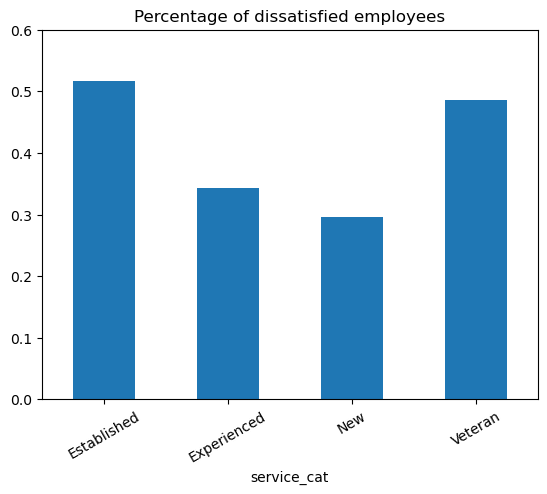

In [52]:
# method to plot the results
%matplotlib inline
perc_dissatisfied.plot(kind="bar",
                       title="Percentage of dissatisfied employees",
                       ylim=(0,0.6),
                       legend=False,
                       rot=30
                      )
plt.show()

### Conclusion

From our plot, we observe that majority of the employees who exited due to dissatisfaction had worked for atleast 7 in the company. The percentage of new employees exiting the a company because of dissatisfaction is relatively low.